In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
data = pd.read_csv("wepman.csv")

In [3]:
data.head(20)

,Score,Gender,Disability
0,40.0,Female,YES
1,55.0,Female,YES
2,37.5,Female,YES
3,47.5,Male,YES
4,25.0,Female,YES
5,60.0,Female,YES
6,62.5,Female,YES
7,12.5,Female,YES
8,95.0,Male,NO
9,17.5,Male,YES


In [4]:
data.shape

(80, 3)

In [6]:
data.isna().sum()

Score         0
Gender        0
Disability    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Score       80 non-null     float64
 1   Gender      80 non-null     object 
 2   Disability  80 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.0+ KB


In [9]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(exclude="int64").columns
print(CateList)

Index(['Score', 'Gender', 'Disability'], dtype='object')


In [10]:
for i in ['Gender', 'Disability']:
    data[i] = LE.fit_transform(data[i])

In [11]:
print(LE.classes_)

['NO' 'YES']


In [12]:
data.head(30)

,Score,Gender,Disability
0,40.0,0,1
1,55.0,0,1
2,37.5,0,1
3,47.5,1,1
4,25.0,0,1
5,60.0,0,1
6,62.5,0,1
7,12.5,0,1
8,95.0,1,0
9,17.5,1,1


In [13]:
data.cov()

,Score,Gender,Disability
Score,843.354430,0.000000e+00,-1.110759e+01
Gender,0.000000,2.531646e-01,4.216037e-18
Disability,-11.107595,4.216037e-18,2.221519e-01


In [14]:
data.describe()

,Score,Gender,Disability
count,80.000000,80.000000,80.00000
mean,51.250000,0.500000,0.67500
std,29.040565,0.503155,0.47133
min,2.500000,0.000000,0.00000
25%,26.875000,0.000000,0.00000
50%,51.250000,0.500000,1.00000
75%,75.625000,1.000000,1.00000
max,100.000000,1.000000,1.00000


In [15]:
corr = data.corr()

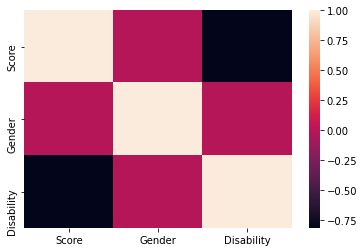

In [16]:
sns.heatmap(corr)

In [17]:
import sympy 

In [18]:
reduced_form, inds = sympy.Matrix(data.values).rref()
reduced_form

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [19]:
inds

(0, 1, 2)

In [20]:
inds = list(inds)
inds

[0, 1, 2]

In [22]:
for i in range(3):
    if(i not in inds):
        print(data.columns[i])

In [23]:
data.head(20)

,Score,Gender,Disability
0,40.0,0,1
1,55.0,0,1
2,37.5,0,1
3,47.5,1,1
4,25.0,0,1
5,60.0,0,1
6,62.5,0,1
7,12.5,0,1
8,95.0,1,0
9,17.5,1,1


In [24]:
data = data.drop(['Gender'], axis = 1) 

In [25]:
data.head(20)

,Score,Disability
0,40.0,1
1,55.0,1
2,37.5,1
3,47.5,1
4,25.0,1
5,60.0,1
6,62.5,1
7,12.5,1
8,95.0,0
9,17.5,1


In [26]:
corr = data.corr()

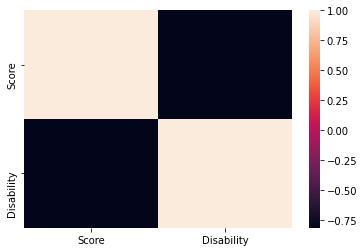

In [27]:
sns.heatmap(corr)

In [28]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [29]:
data.head()

,Score,Disability
0,40.0,1
1,55.0,1
2,37.5,1
3,47.5,1
4,25.0,1


In [30]:
data.shape

(80, 2)

In [31]:
data = data.drop_duplicates()

In [32]:
data.shape

(40, 2)

In [33]:
data.head()

,Score,Disability
0,40.0,1
1,55.0,1
2,37.5,1
3,47.5,1
4,25.0,1


In [58]:
X=data.drop(['Disability'],axis=1).values
y=data['Disability'].values
print(X.shape, y.shape)

(40, 1) (40,)


In [64]:
from sklearn.svm import SVC

In [65]:
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [68]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(30, 1) (30,)
(10, 1) (10,)


In [69]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [70]:
accuracy_score(y_test, clf.predict(X_test))

1.0

In [71]:
clf = SVC(kernel='linear') 
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
pred = clf.predict([[47.5]])
pred

array([1])

In [73]:
if(pred[0]==0):
    print("No")
else:
  print("Yes")   

Yes


In [74]:
import pickle 

In [75]:
from sklearn.externals import joblib  
joblib.dump(clf, 'wepman.pkl') 
loaded_model = joblib.load('wepman.pkl')  
  
# Use the loaded model to make predictions 
loaded_model.predict([[47.5]]) 

array([1])